In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_13024/950747112.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data Preparationn

In [2]:
df = pd.read_csv("./dataset/diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data Cleaning

In [5]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
print(df.duplicated().sum())

0


In [8]:
print(df["Outcome"].duplicated().sum())

766


# EDA

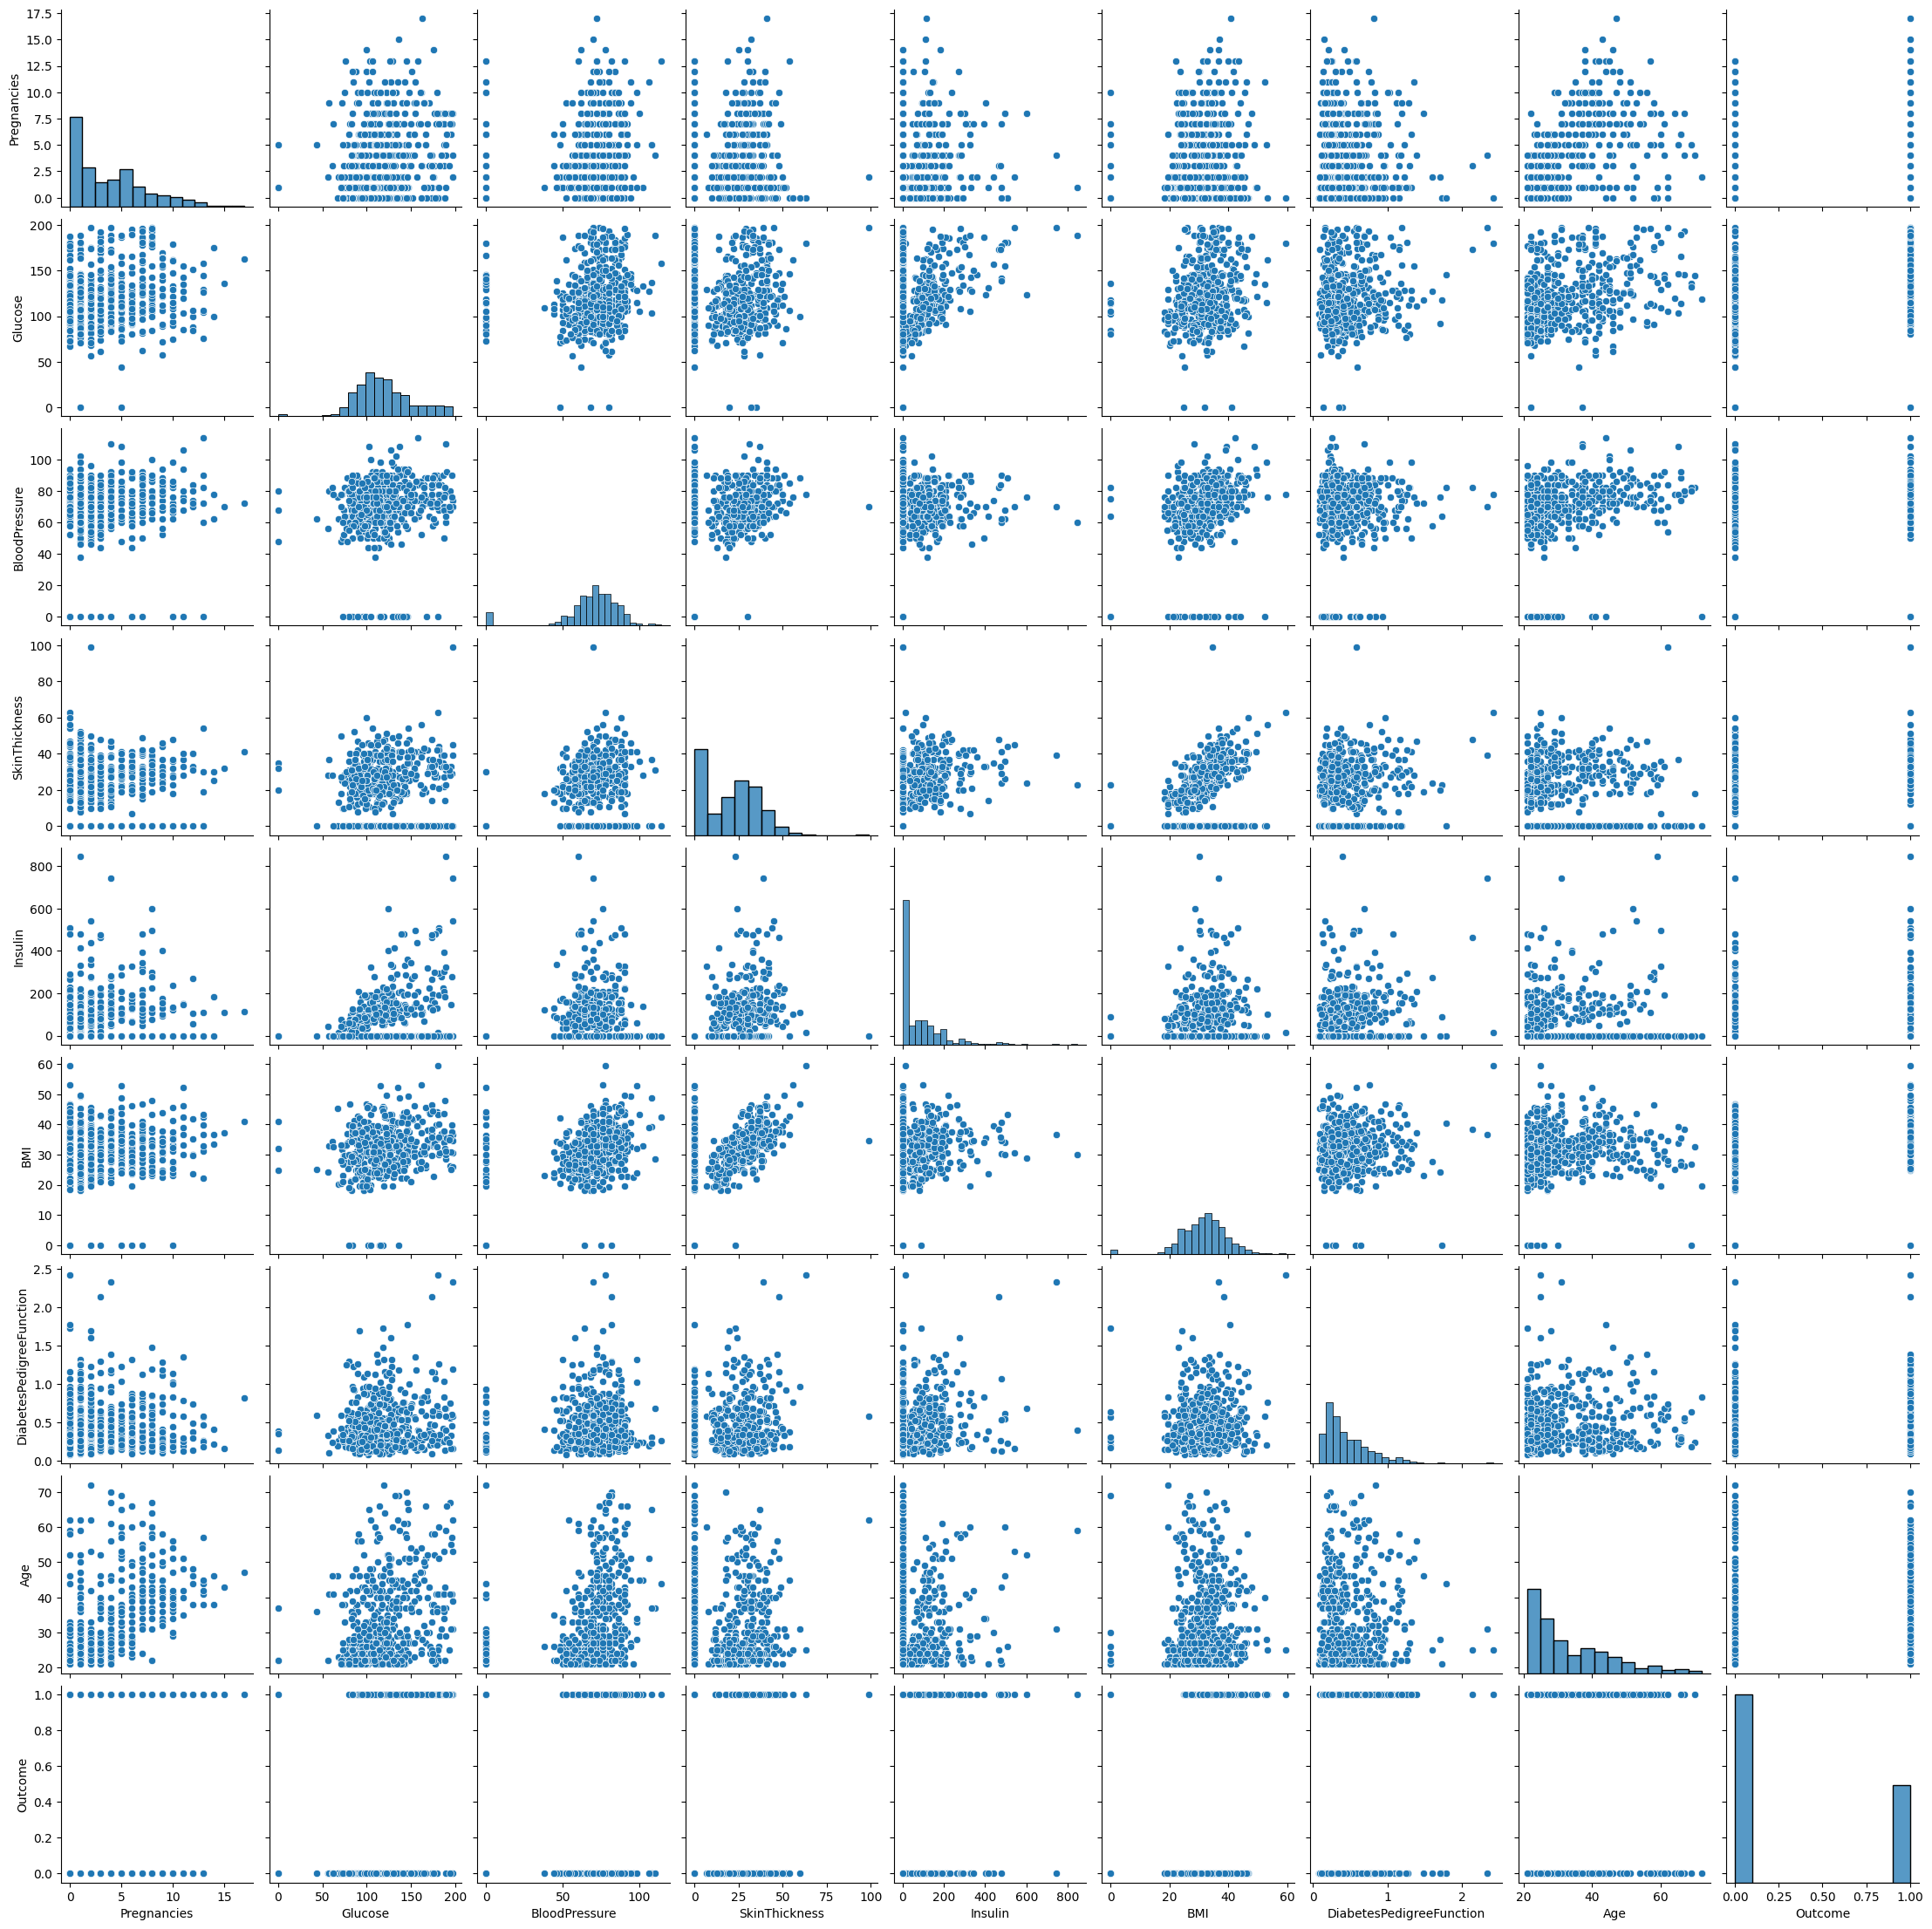

In [9]:
sns.pairplot(df.sample(n=500))
plt.show()

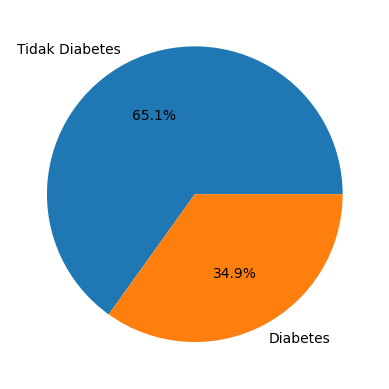

In [15]:
plt.pie([(df["Outcome"] == 0).sum(),(df["Outcome"] == 1).sum()], labels=["Tidak Diabetes", "Diabetes"], autopct='%1.1f%%')
plt.show()

In [16]:
# Membuat kategori umur per 10 tahun
df['Age_Group'] = pd.cut(df['Age'], bins=range(20, 101, 10), right=False)

# Mengelompokkan data berdasarkan kategori umur dan menghitung jumlah diabetes dan tidak diabetes untuk setiap kelompok umur
age_grouped = df.groupby('Age_Group')['Outcome'].value_counts().unstack().fillna(0)


/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_13024/2166649736.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df.groupby('Age_Group')['Outcome'].value_counts().unstack().fillna(0)


/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_13024/2027981283.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df.groupby('Age_Group')['Outcome'].value_counts().unstack().fillna(0)


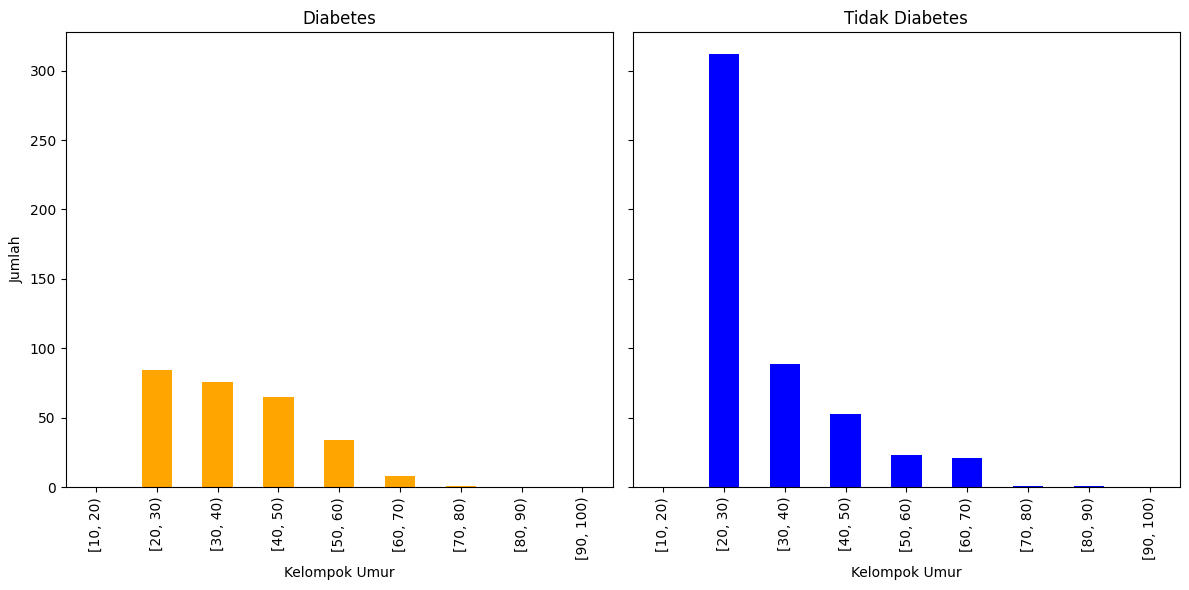

In [22]:
df['Age_Group'] = pd.cut(df['Age'], bins=range(10, 101, 10), right=False)

# Mengelompokkan data berdasarkan kategori umur dan menghitung jumlah diabetes dan tidak diabetes untuk setiap kelompok umur
age_grouped = df.groupby('Age_Group')['Outcome'].value_counts().unstack().fillna(0)

# Membuat dua subplot untuk diabetes dan tidak diabetes dengan tinggi yang sama
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Plot untuk diabetes
age_grouped[1].plot(kind='bar', ax=axes[0], color='orange')
axes[0].set_title('Diabetes')
axes[0].set_xlabel('Kelompok Umur')
axes[0].set_ylabel('Jumlah')

# Plot untuk tidak diabetes
age_grouped[0].plot(kind='bar', ax=axes[1], color='blue')
axes[1].set_title('Tidak Diabetes')
axes[1].set_xlabel('Kelompok Umur')
axes[1].set_ylabel('Jumlah')

# Menampilkan plot
plt.tight_layout()
plt.show()

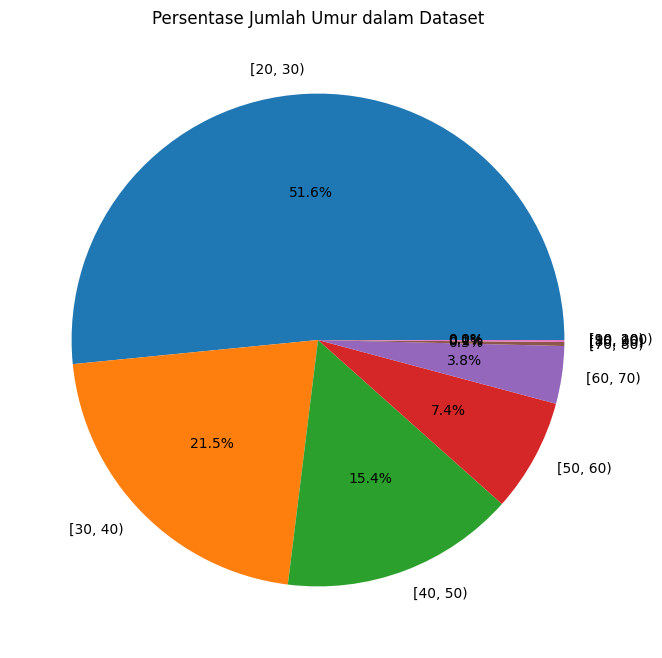

In [23]:
# Membuat kategori umur per 10 tahun
df['Age_Group'] = pd.cut(df['Age'], bins=range(10, 101, 10), right=False)

# Menghitung jumlah data untuk setiap kelompok umur
age_counts = df['Age_Group'].value_counts()

# Membuat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Persentase Jumlah Umur dalam Dataset')
plt.show()

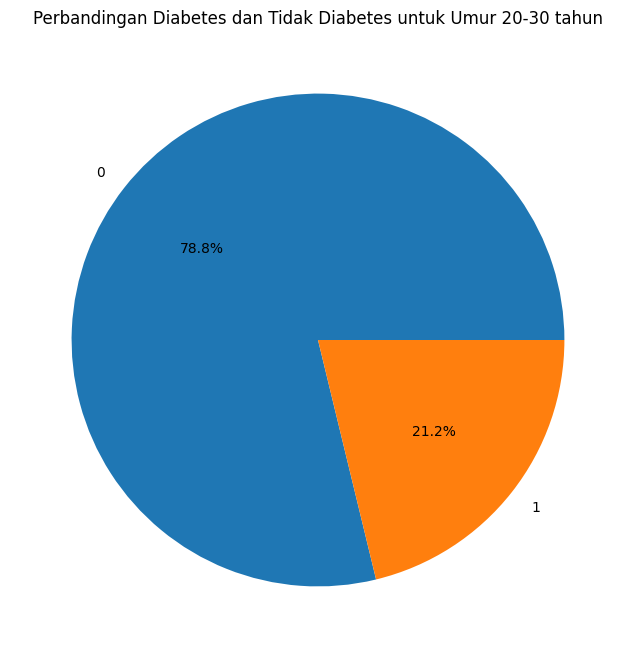

In [24]:
# Filter data untuk rentang umur 20-30 tahun
age_20_to_30 = df[(df['Age'] >= 20) & (df['Age'] < 30)]

# Hitung jumlah diabetes dan tidak diabetes
diabetes_counts = age_20_to_30['Outcome'].value_counts()

# Buat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%')
plt.title('Perbandingan Diabetes dan Tidak Diabetes untuk Umur 20-30 tahun')
plt.show()